# Description

TODO

# Modules

In [118]:
import pandas as pd
import numpy as np

# from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn.preprocessing import minmax_scale

from clustermatch import conf
from clustermatch.coef import cm

# Settings

In [2]:
DATASET_CONFIG = conf.GTEX
GTEX_TISSUE = "whole_blood"
GENE_SEL_STRATEGY = "var_pc_log2"

# Paths

In [3]:
assert (
    conf.MANUSCRIPT["BASE_DIR"] is not None and conf.MANUSCRIPT["BASE_DIR"].exists()
), "Manuscript dir not set"

In [4]:
OUTPUT_FIGURE_DIR = conf.MANUSCRIPT["FIGURES_DIR"] / "coefs_comp"
OUTPUT_FIGURE_DIR.mkdir(parents=True, exist_ok=True)
display(OUTPUT_FIGURE_DIR)

PosixPath('/opt/manuscript/content/images/coefs_comp')

In [5]:
INPUT_GENE_EXPR_FILE = (
    DATASET_CONFIG["GENE_SELECTION_DIR"]
    / f"gtex_v8_data_{GTEX_TISSUE}-{GENE_SEL_STRATEGY}.pkl"
)
display(INPUT_GENE_EXPR_FILE)

assert INPUT_GENE_EXPR_FILE.exists()

PosixPath('/opt/data/results/gtex_v8/gene_selection/gtex_v8_data_whole_blood-var_pc_log2.pkl')

In [6]:
INPUT_CORR_FILE_TEMPLATE = (
    DATASET_CONFIG["SIMILARITY_MATRICES_DIR"]
    / DATASET_CONFIG["SIMILARITY_MATRIX_FILENAME_TEMPLATE"]
)
display(INPUT_CORR_FILE_TEMPLATE)

PosixPath('/opt/data/results/gtex_v8/similarity_matrices/gtex_v8_data_{tissue}-{gene_sel_strategy}-{corr_method}.pkl')

In [7]:
INPUT_CORR_FILE = DATASET_CONFIG["SIMILARITY_MATRICES_DIR"] / str(
    INPUT_CORR_FILE_TEMPLATE
).format(
    tissue=GTEX_TISSUE,
    gene_sel_strategy=GENE_SEL_STRATEGY,
    corr_method="all",
)
display(INPUT_CORR_FILE)

assert INPUT_CORR_FILE.exists()

PosixPath('/opt/data/results/gtex_v8/similarity_matrices/gtex_v8_data_whole_blood-var_pc_log2-all.pkl')

# Data

## Gene Ensembl ID -> Symbol mapping

In [8]:
gene_map = pd.read_pickle(
    DATASET_CONFIG["DATA_DIR"] / "gtex_gene_id_symbol_mappings.pkl"
)

In [9]:
gene_map = gene_map.set_index("gene_ens_id")["gene_symbol"].to_dict()

In [10]:
assert gene_map["ENSG00000145309.5"] == "CABS1"

## Gene expression

In [11]:
gene_expr_df = pd.read_pickle(INPUT_GENE_EXPR_FILE)

In [12]:
gene_expr_df.shape

(5000, 755)

In [13]:
gene_expr_df.head()

,GTEX-111YS-0006-SM-5NQBE,GTEX-1122O-0005-SM-5O99J,GTEX-1128S-0005-SM-5P9HI,GTEX-113IC-0006-SM-5NQ9C,GTEX-113JC-0006-SM-5O997,GTEX-117XS-0005-SM-5PNU6,GTEX-117YW-0005-SM-5NQ8Z,GTEX-1192W-0005-SM-5NQBQ,GTEX-1192X-0005-SM-5NQC3,GTEX-11DXW-0006-SM-5NQ7Y,...,GTEX-ZVE2-0006-SM-51MRW,GTEX-ZVP2-0005-SM-51MRK,GTEX-ZVT2-0005-SM-57WBW,GTEX-ZVT3-0006-SM-51MT9,GTEX-ZVT4-0006-SM-57WB8,GTEX-ZVTK-0006-SM-57WBK,GTEX-ZVZP-0006-SM-51MSW,GTEX-ZVZQ-0006-SM-51MR8,GTEX-ZXES-0005-SM-57WCB,GTEX-ZXG5-0005-SM-57WCN
gene_ens_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000169429.10,0.5623,0.8067,116.90000,4.047,211.0,58.110,68.38,249.50,5.095,295.9,...,39.960,0.1393,0.22380,245.0,513.6,1626.00,0.5633,515.70,1.19400,1163.00
ENSG00000135245.9,0.6529,1.3850,199.20000,2.266,116.7,192.300,161.50,263.50,23.540,251.9,...,114.300,1.8330,0.41150,149.0,935.3,233.60,0.8882,134.00,1.12000,295.70
ENSG00000163631.16,1.8480,0.2503,0.08429,1.251,1348.0,9.971,101.30,95.09,1.264,119.3,...,2.092,2.1100,0.03588,171.8,107.1,71.25,1.7720,309.60,0.07361,17.75
ENSG00000277632.1,1.6960,1.3450,235.10000,11.770,141.7,199.100,525.50,659.90,10.910,209.3,...,61.340,2.2500,0.72310,261.2,400.0,288.50,2.6960,287.50,3.32300,618.90
ENSG00000239839.6,185.2000,1.7790,694.30000,23.840,297.3,3122.000,2521.00,1504.00,80.060,652.0,...,1010.000,253.8000,94.52000,6083.0,2768.0,52.06,34.5700,17.36,352.30000,63.85


## Correlation

In [14]:
df = pd.read_pickle(INPUT_CORR_FILE)

In [15]:
df.shape

(12497500, 3)

In [16]:
df.head()

clustermatch   pearson  spearman
ENSG00000000419.12 ENSG00000002834.17      0.418721  0.681847  0.786595
                   ENSG00000002919.14      0.405090  0.734699  0.816991
                   ENSG00000002933.7       0.007466  0.013825  0.004128
                   ENSG00000003402.19      0.391683  0.727347  0.803653
                   ENSG00000004478.7       0.099013  0.094147  0.231269

In [233]:
df.apply(lambda x: x.quantile(np.linspace(0.20, 1.0, 20)))

,clustermatch,pearson,spearman
0.200000,0.022719,0.072940,0.128198
0.242105,0.027466,0.090891,0.157408
0.284211,0.032678,0.110196,0.187676
0.326316,0.038882,0.131066,0.219424
0.368421,0.046496,0.153705,0.253012
0.410526,0.054956,0.178290,0.288341
0.452632,0.065748,0.205194,0.324886
0.494737,0.079110,0.234929,0.362750
0.536842,0.094529,0.267921,0.401768
0.578947,0.112897,0.304762,0.441738


# Intersection plot

In [17]:
from upsetplot import plot, from_indicators

## Prepare data

In [18]:
def get_lower_upper_quantile(method_name, q):
    return df[method_name].quantile([q, 1 - q])

In [19]:
# test
_tmp = get_lower_upper_quantile("clustermatch", 0.20)
display(_tmp)

_tmp0, _tmp1 = _tmp
display((_tmp0, _tmp1))

assert _tmp0 == _tmp.iloc[0]
assert _tmp1 == _tmp.iloc[1]

0.2    0.022719
0.8    0.259050
Name: clustermatch, dtype: float64

(0.02271880444305697, 0.259049765543866)

In [20]:
# TODO: move this to Settings
_q_diff = 0.30

clustermatch_lq, clustermatch_hq = get_lower_upper_quantile("clustermatch", _q_diff)
display((clustermatch_lq, clustermatch_hq))

pearson_lq, pearson_hq = get_lower_upper_quantile("pearson", _q_diff)
display((pearson_lq, pearson_hq))

spearman_lq, spearman_hq = get_lower_upper_quantile("spearman", _q_diff)
display((spearman_lq, spearman_hq))

(0.034958339010692396, 0.18194034996376532)

(0.11783518340101658, 0.43471104354487755)

(0.1993565001342337, 0.5627397462227566)

In [21]:
pearson_higher = df["pearson"] >= pearson_hq
display(pearson_higher.sum())

3749250

In [22]:
pearson_lower = df["pearson"] <= pearson_lq
display(pearson_lower.sum())

3749250

In [23]:
spearman_higher = df["spearman"] >= spearman_hq
display(spearman_higher.sum())

3749250

In [24]:
spearman_lower = df["spearman"] <= spearman_lq
display(spearman_lower.sum())

3749250

In [25]:
clustermatch_higher = df["clustermatch"] >= clustermatch_hq
display(clustermatch_higher.sum())

3754664

In [26]:
clustermatch_lower = df["clustermatch"] <= clustermatch_lq
display(clustermatch_lower.sum())

3749265

## Plot

In [27]:
df_plot = pd.DataFrame(
    {
        "pearson_higher": pearson_higher,
        "pearson_lower": pearson_lower,
        "spearman_higher": spearman_higher,
        "spearman_lower": spearman_lower,
        "clustermatch_higher": clustermatch_higher,
        "clustermatch_lower": clustermatch_lower,
    }
)

In [28]:
df_plot = pd.concat([df_plot, df], axis=1)

In [29]:
df_plot

pearson_higher  pearson_lower  \
ENSG00000000419.12 ENSG00000002834.17            True          False   
                   ENSG00000002919.14            True          False   
                   ENSG00000002933.7            False           True   
                   ENSG00000003402.19            True          False   
                   ENSG00000004478.7            False           True   
...                                               ...            ...   
ENSG00000284574.1  ENSG00000282651.2            False           True   
                   ENSG00000282780.1            False           True   
                   ENSG00000282939.1            False           True   
                   ENSG00000283063.1            False           True   
                   ENSG00000283602.1            False           True   

                                       spearman_higher  spearman_lower  \
ENSG00000000419.12 ENSG00000002834.17             True           False   
                   ENSG00000002919.14             True           False   
                   ENSG00000002933.7             False            True   
                   ENSG00000003402.19             True           False   
                   ENSG00000004478.7             False           False   
...                                                ...             ...   
ENSG00000284574.1  ENSG00000282651.2             False            True   
                   ENSG00000282780.1             False            True   
                   ENSG00000282939.1             False            True   
                   ENSG00000283063.1             False            True   
                   ENSG00000283602.1             False            True   

                                       clustermatch_higher  \
ENSG00000000419.12 ENSG00000002834.17                 True   
                   ENSG00000002919.14                 True   
                   ENSG00000002933.7                 False   
                   ENSG00000003402.19                 True   
                   ENSG00000004478.7                 False   
...                                                    ...   
ENSG00000284574.1  ENSG00000282651.2                 False   
                   ENSG00000282780.1                 False   
                   ENSG00000282939.1                 False   
                   ENSG00000283063.1                 False   
                   ENSG00000283602.1                 False   

                                       clustermatch_lower  clustermatch  \
ENSG00000000419.12 ENSG00000002834.17               False      0.418721   
                   ENSG00000002919.14               False      0.405090   
                   ENSG00000002933.7                 True      0.007466   
                   ENSG00000003402.19               False      0.391683   
                   ENSG00000004478.7                False      0.099013   
...                                                   ...           ...   
ENSG00000284574.1  ENSG00000282651.2                 True      0.011968   
                   ENSG00000282780.1                 True      0.004975   
                   ENSG00000282939.1                 True      0.011968   
                   ENSG00000283063.1                 True      0.006638   
                   ENSG00000283602.1                 True      0.013967   

                                        pearson  spearman  
ENSG00000000419.12 ENSG00000002834.17  0.681847  0.786595  
                   ENSG00000002919.14  0.734699  0.816991  
                   ENSG00000002933.7   0.013825  0.004128  
                   ENSG00000003402.19  0.727347  0.803653  
                   ENSG00000004478.7   0.094147  0.231269  
...                                         ...       ...  
ENSG00000284574.1  ENSG00000282651.2   0.051215  0.089428  
                   ENSG00000282780.1   0.031741  0.018411  
                   ENSG00000282939.1   0.029699  0.104518  
                   ENSG00000283063.1   

In [30]:
categories = sorted(
    [x for x in df_plot.columns if "_" in x],
    reverse=True,
    key=lambda x: x.split("_")[1] + "_" + x.split("_")[0],
)

In [31]:
categories

['spearman_lower',
 'pearson_lower',
 'clustermatch_lower',
 'spearman_higher',
 'pearson_higher',
 'clustermatch_higher']

## Python - UpSet

### All subsets

In [32]:
df_r_data = df_plot

In [33]:
df_r_data.shape

(12497500, 9)

In [34]:
gene_pairs_by_cats = from_indicators(categories, data=df_r_data)

{'matrix': <AxesSubplot:>,
 'shading': <AxesSubplot:>,
 'totals': <AxesSubplot:>,
 'intersections': <AxesSubplot:ylabel='Intersection size'>}

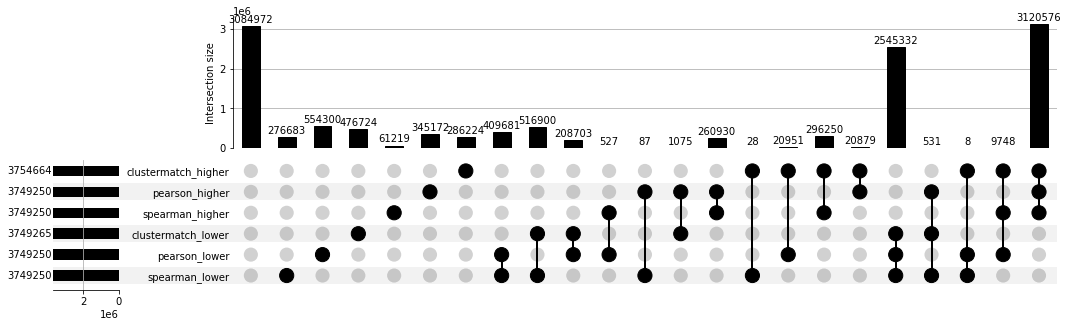

In [36]:
fig = plt.figure(figsize=(18, 5))

plot(
    gene_pairs_by_cats,
    show_counts=True,
    sort_categories_by=None,
    # show_percentages=True,
    # min_subset_size=2,
    element_size=None,
    fig=fig,
)

### Remove subsets of size one

In [37]:
# remove cases that are found only in one group
df_r_data = df_plot[df_plot[categories].sum(axis=1) > 1]
display(df_r_data.shape)

(7412206, 9)

In [38]:
df_r_data.shape

(7412206, 9)

In [39]:
gene_pairs_by_cats = from_indicators(categories, data=df_r_data)

{'matrix': <AxesSubplot:>,
 'shading': <AxesSubplot:>,
 'totals': <AxesSubplot:>,
 'intersections': <AxesSubplot:ylabel='Intersection size'>}

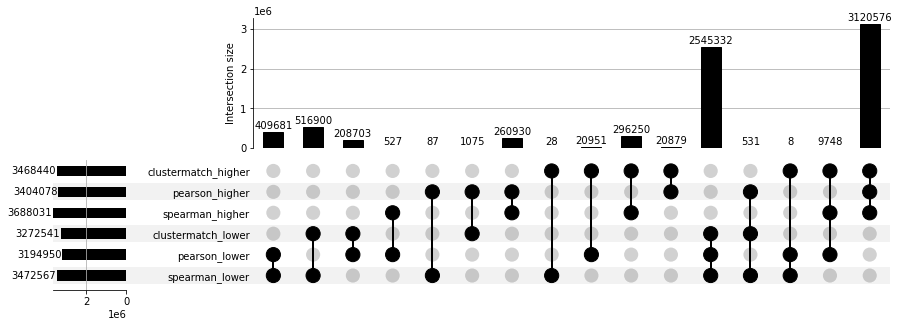

In [40]:
fig = plt.figure(figsize=(15, 5))

plot(
    gene_pairs_by_cats,
    show_counts=True,
    sort_categories_by=None,
    # show_percentages=True,
    # min_subset_size=2,
    element_size=None,
    fig=fig,
)

### Remove non-interesting subsets

In [56]:
lower_columns = [x for x in categories if x.endswith("_lower")]
display(lower_columns)

higher_columns = [x for x in categories if x.endswith("_higher")]
display(higher_columns)

['spearman_lower', 'pearson_lower', 'clustermatch_lower']

['spearman_higher', 'pearson_higher', 'clustermatch_higher']

In [61]:
df_r_data = df_plot[
    (df_plot[categories].sum(axis=1) > 1)
    & ~(
        (df_plot[lower_columns].sum(axis=1).isin((0, 3)))
        & (df_plot[higher_columns].sum(axis=1).isin((0, 3)))
    )
]

In [62]:
df_r_data.shape

(1746298, 9)

In [63]:
gene_pairs_by_cats = from_indicators(categories, data=df_r_data)

{'matrix': <AxesSubplot:>,
 'shading': <AxesSubplot:>,
 'totals': <AxesSubplot:>,
 'intersections': <AxesSubplot:ylabel='Intersection size'>}

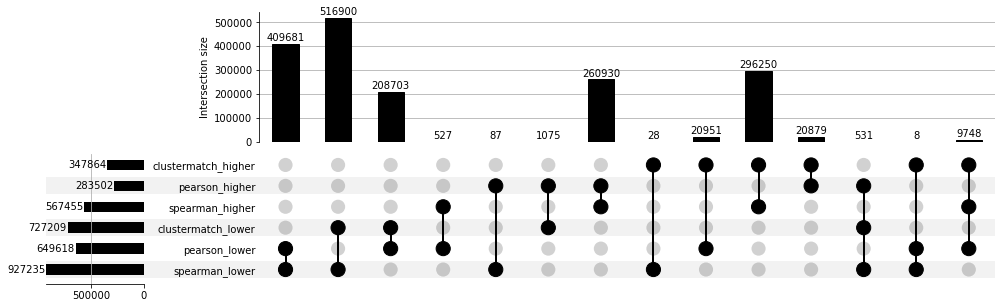

In [101]:
fig = plt.figure(figsize=(17, 5))

plot(
    gene_pairs_by_cats,
    show_counts=True,
    sort_categories_by=None,
    # show_percentages=True,
    # min_subset_size=2,
    element_size=None,
    fig=fig,
)

## Look at specific cases

In [85]:
def plot_gene_pair(top_pairs_df, idx, bins="log"):
    gene0, gene1 = top_pairs_df.iloc[idx].name
    display((gene0, gene1))

    gene0_symbol, gene1_symbol = gene_map[gene0], gene_map[gene1]
    display((gene0_symbol, gene1_symbol))

    _pearson, _spearman, _clustermatch = top_pairs_df.loc[
        (gene0, gene1), ["pearson", "spearman", "clustermatch"]
    ].tolist()

    _title = f"Clustermatch: {_clustermatch:.2f}\nPearson/Spearman: {_pearson:.2f}/{_spearman:.2f}"

    p = sns.jointplot(
        data=gene_expr_df.T,
        x=gene0,
        y=gene1,
        kind="hex",
        bins=bins,
        # ylim=(0, 500),
    )

    gene_x_id = p.ax_joint.get_xlabel()
    gene_x_symbol = gene_map[gene_x_id]
    p.ax_joint.set_xlabel(f"{gene_x_id}\n{gene_x_symbol}")

    gene_y_id = p.ax_joint.get_ylabel()
    gene_y_symbol = gene_map[gene_y_id]
    p.ax_joint.set_ylabel(f"{gene_y_id}\n{gene_y_symbol}")

    p.fig.suptitle(_title)

### Clustermatch vs Spearman

In [198]:
_tmp_df = df_r_data[
    (df_r_data["clustermatch_higher"])
    & ~(df_r_data["spearman_higher"])
    & ~(df_r_data["pearson_higher"])
    & ~(df_r_data["clustermatch_lower"])
    & (df_r_data["spearman_lower"])
    & ~(df_r_data["pearson_lower"])
]

# show this just to make sure of the groups
# display(_tmp_df.head())

_tmp_df = _tmp_df[[x for x in df_r_data.columns if "_" not in x]].sort_values(
    "clustermatch", ascending=False
)

display(_tmp_df.shape)
display(_tmp_df)

(28, 3)

clustermatch   pearson  spearman
ENSG00000147050.14 ENSG00000183878.15      0.294391  0.239870  0.100621
ENSG00000115165.9  ENSG00000235750.9       0.205803  0.158792  0.110038
                   ENSG00000101265.15      0.201962  0.156060  0.107882
ENSG00000198034.10 ENSG00000099725.14      0.198590  0.361447  0.197205
ENSG00000147050.14 ENSG00000067048.16      0.193557  0.237462  0.035350
ENSG00000137275.13 ENSG00000100226.15      0.193464  0.171169  0.196367
ENSG00000064666.14 ENSG00000100226.15      0.193464  0.169898  0.189400
ENSG00000107771.15 ENSG00000174151.14      0.193464  0.211882  0.190765
ENSG00000196663.15 ENSG00000100226.15      0.193464  0.149426  0.191243
ENSG00000167378.8  ENSG00000174151.14      0.193464  0.195318  0.181863
ENSG00000115165.9  ENSG00000105514.7       0.192490  0.237330  0.176075
ENSG00000255139.1  ENSG00000101265.15      0.190994  0.165878  0.187627
ENSG00000115165.9  ENSG00000160785.13      0.190192  0.150949  0.098379
                   ENSG00000241878.11      0.190023  0.241985  0.182072
ENSG00000140455.16 ENSG00000100226.15      0.188812  0.179639  0.196454
ENSG00000142599.17 ENSG00000100226.15      0.188812  0.165703  0.194947
ENSG00000171608.15 ENSG00000100226.15      0.188812  0.171990  0.199252
ENSG00000107771.15 ENSG00000185905.3       0.188812  0.247591  0.199203
ENSG00000115165.9  ENSG00000197324.8       0.184938  0.208519  0.172818
ENSG00000129925.10 ENSG00000100226.15      0.184217  0.154006  0.181951
ENSG00000059804.15 ENSG00000174125.7       0.184217  0.136732  0.195543
ENSG00000167378.8  ENSG00000143412.9       0.184217  0.201746  0.189370
ENSG00000110057.7  ENSG00000100226.15      0.184217  0.166148  0.198736
ENSG00000198001.13 ENSG00000100226.15      0.184217  0.197282  0.195093
ENSG00000205045.8  ENSG00000130772.13      0.184217  0.200673  0.194881
ENSG00000005379.15 ENSG00000174151.14      0.184217  0.166414  0.181505
ENSG00000168887.10 ENSG00000227782.2       0.181940  0.125835  0.187428
ENSG00000107771.15 ENSG00000166272.16      0.181940  0.250624  0.198440

('ENSG00000147050.14', 'ENSG00000183878.15')

('KDM6A', 'UTY')

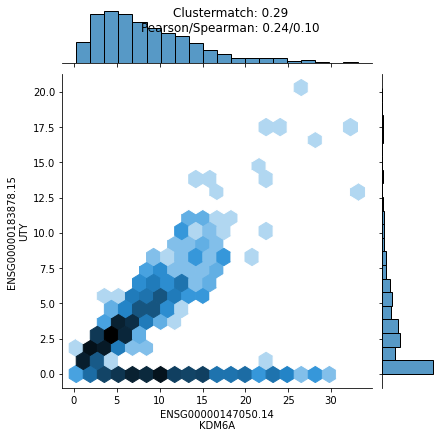

In [77]:
plot_gene_pair(_tmp_df, 0)

UTY is from chr Y and KDM6A is from chr X, so males and females samples explain this relationship.

('ENSG00000115165.9', 'ENSG00000235750.9')

('CYTIP', 'KIAA0040')

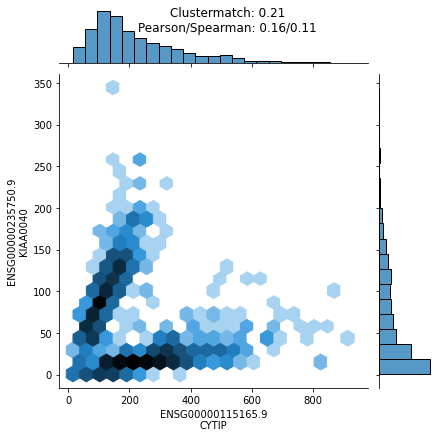

In [78]:
plot_gene_pair(_tmp_df, 1)

KIAA0040 (chr 1) and CYTIP (chr 2)

('ENSG00000115165.9', 'ENSG00000101265.15')

('CYTIP', 'RASSF2')

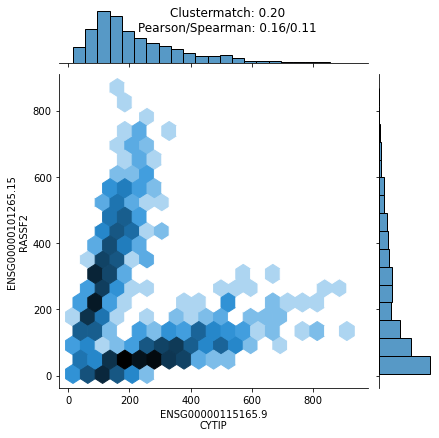

In [79]:
plot_gene_pair(_tmp_df, 2)

KIAA0040 (chr 1) and CYTIP (chr 2)

('ENSG00000167378.8', 'ENSG00000174151.14')

('IRGQ', 'CYB561D1')

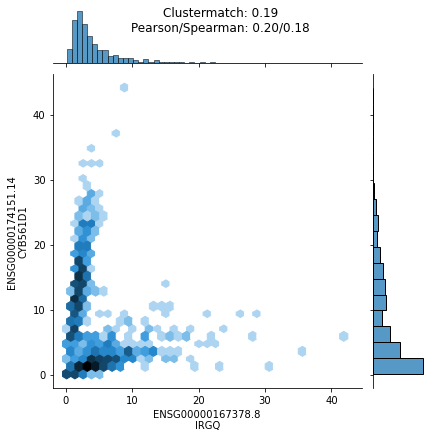

In [205]:
plot_gene_pair(_tmp_df, 9)

### Clustermatch vs Pearson

In [86]:
_tmp_df = df_r_data[
    (df_r_data["clustermatch_higher"])
    & ~(df_r_data["spearman_higher"])
    & ~(df_r_data["pearson_higher"])
    & ~(df_r_data["clustermatch_lower"])
    & ~(df_r_data["spearman_lower"])
    & (df_r_data["pearson_lower"])
]

# show this just to make sure of the groups
# display(_tmp_df.head())

_tmp_df = _tmp_df[[x for x in df_r_data.columns if "_" not in x]].sort_values(
    "clustermatch", ascending=False
)

display(_tmp_df.shape)
display(_tmp_df)

(20951, 3)

clustermatch   pearson  spearman
ENSG00000124659.6  ENSG00000111537.4       0.468202  0.076129  0.544895
ENSG00000236409.1  ENSG00000149257.13      0.460965  0.111842  0.540108
ENSG00000275385.1  ENSG00000160446.18      0.446659  0.099853  0.560171
ENSG00000236409.1  ENSG00000151929.9       0.439590  0.096174  0.502060
ENSG00000139278.9  ENSG00000111537.4       0.439590  0.096601  0.532489
...                                             ...       ...       ...
ENSG00000182853.11 ENSG00000176083.17      0.181940  0.075223  0.495197
                   ENSG00000125780.11      0.181940  0.063719  0.478540
                   ENSG00000113905.4       0.181940  0.022184  0.495017
                   ENSG00000105205.6       0.181940  0.038582  0.493528
ENSG00000105486.13 ENSG00000234906.9       0.181940  0.019610  0.472049

[20951 rows x 3 columns]

('ENSG00000124659.6', 'ENSG00000111537.4')

('TBCC', 'IFNG')

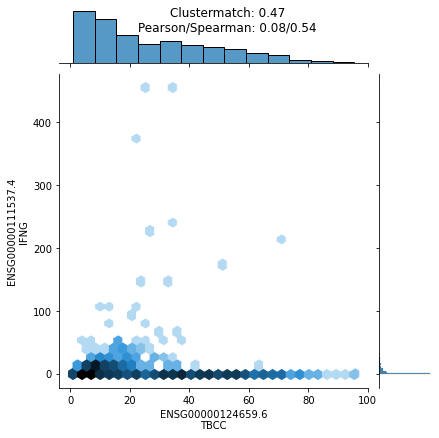

In [89]:
plot_gene_pair(_tmp_df, 0)

('ENSG00000236409.1', 'ENSG00000149257.13')

('NRADDP', 'SERPINH1')

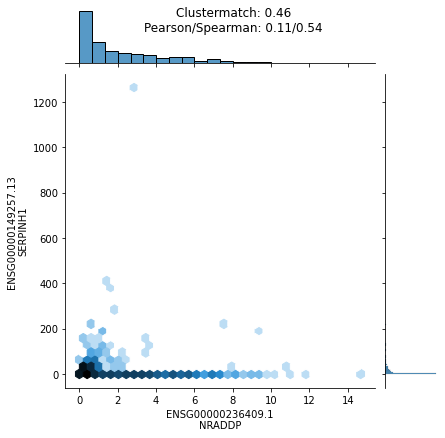

In [90]:
plot_gene_pair(_tmp_df, 1)

('ENSG00000275385.1', 'ENSG00000160446.18')

('CCL18', 'ZDHHC12')

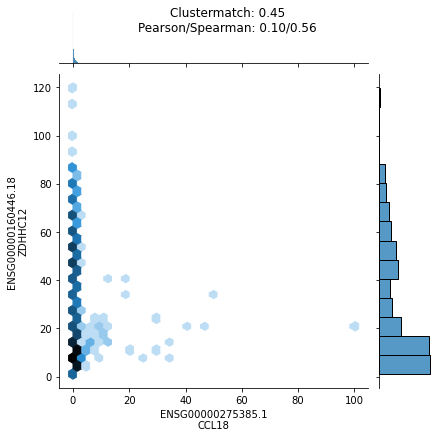

In [91]:
plot_gene_pair(_tmp_df, 2)

### Clustermatch vs Spearman/Pearson

In [92]:
_tmp_df = df_r_data[
    (df_r_data["clustermatch_higher"])
    & ~(df_r_data["spearman_higher"])
    & ~(df_r_data["pearson_higher"])
    & ~(df_r_data["clustermatch_lower"])
    & (df_r_data["spearman_lower"])
    & (df_r_data["pearson_lower"])
]

# show this just to make sure of the groups
# display(_tmp_df.head())

_tmp_df = _tmp_df[[x for x in df_r_data.columns if "_" not in x]].sort_values(
    "clustermatch", ascending=False
)

display(_tmp_df.shape)
display(_tmp_df)

(8, 3)

,,clustermatch,pearson,spearman
ENSG00000101152.10,ENSG00000100226.15,0.193464,0.107576,0.156998
ENSG00000251474.6,ENSG00000229598.1,0.193464,0.073375,0.186682
ENSG00000189114.6,ENSG00000278330.1,0.188812,0.028556,0.192653
ENSG00000225963.7,ENSG00000229598.1,0.184279,0.070892,0.197203
ENSG00000100055.20,ENSG00000100226.15,0.184217,0.087254,0.183848
ENSG00000162413.16,ENSG00000235027.1,0.184217,0.062875,0.186421
ENSG00000125319.14,ENSG00000088325.15,0.183514,0.069207,0.134905
ENSG00000170871.11,ENSG00000229598.1,0.181940,0.067078,0.182466


('ENSG00000101152.10', 'ENSG00000100226.15')

('DNAJC5', 'GTPBP1')

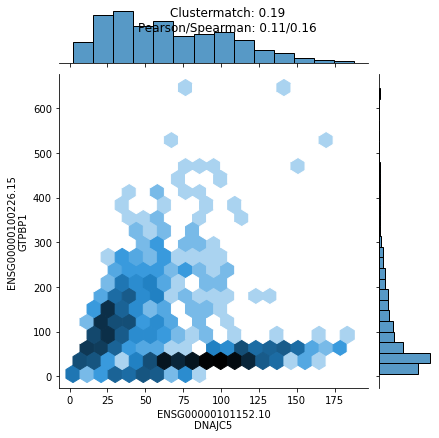

In [93]:
plot_gene_pair(_tmp_df, 0)

('ENSG00000251474.6', 'ENSG00000229598.1')

('RPL32P3', 'PRDX3P1')

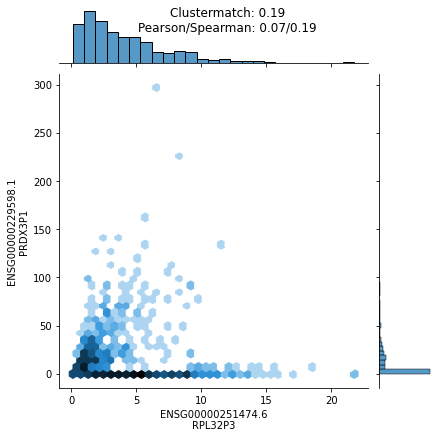

In [94]:
plot_gene_pair(_tmp_df, 1)

('ENSG00000189114.6', 'ENSG00000278330.1')

('BLOC1S3', 'RP11-4B16.4')

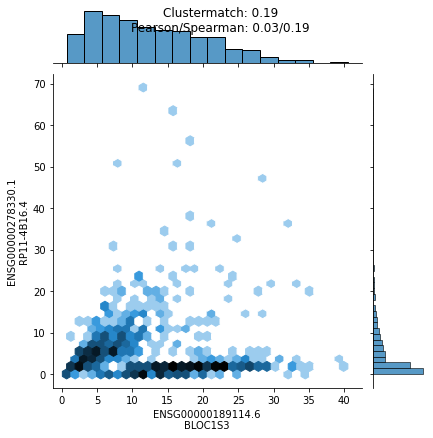

In [95]:
plot_gene_pair(_tmp_df, 2)

('ENSG00000225963.7', 'ENSG00000229598.1')

('AC009950.2', 'PRDX3P1')

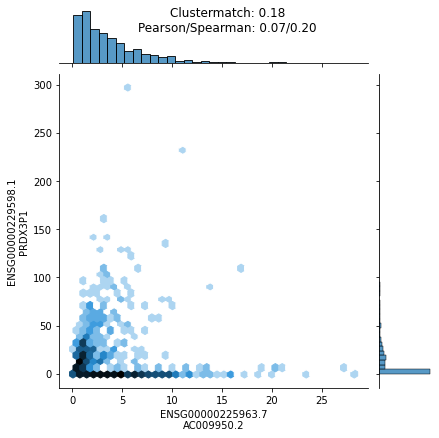

In [96]:
plot_gene_pair(_tmp_df, 3)

('ENSG00000100055.20', 'ENSG00000100226.15')

('CYTH4', 'GTPBP1')

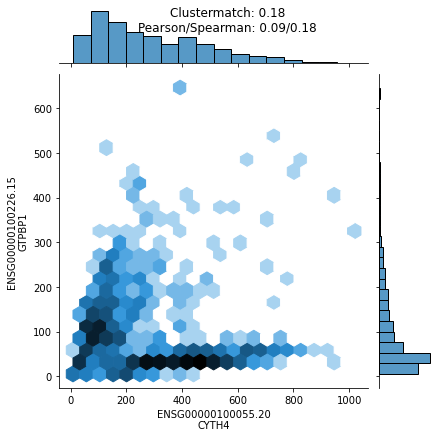

In [97]:
plot_gene_pair(_tmp_df, 4)

('ENSG00000162413.16', 'ENSG00000235027.1')

('KLHL21', 'AC068580.6')

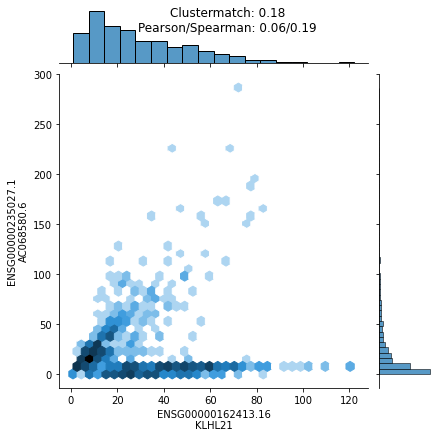

In [98]:
plot_gene_pair(_tmp_df, 5)

('ENSG00000125319.14', 'ENSG00000088325.15')

('C17orf53', 'TPX2')

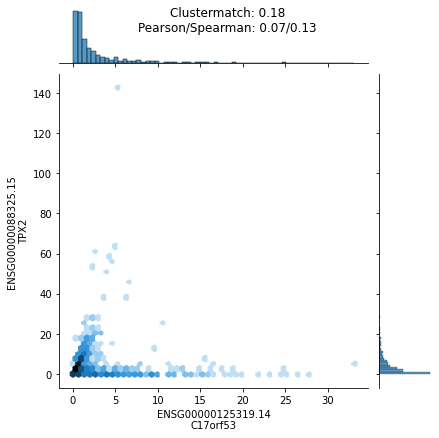

In [99]:
plot_gene_pair(_tmp_df, 6)

('ENSG00000170871.11', 'ENSG00000229598.1')

('KIAA0232', 'PRDX3P1')

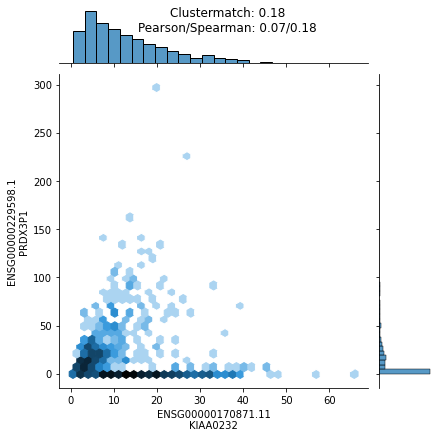

In [100]:
plot_gene_pair(_tmp_df, 7)

### Clustermatch/Spearman vs Pearson

In [225]:
_tmp_df = df_r_data[
    (df_r_data["clustermatch_higher"])
    & (df_r_data["spearman_higher"])
    & ~(df_r_data["pearson_higher"])
    & ~(df_r_data["clustermatch_lower"])
    & ~(df_r_data["spearman_lower"])
    & (df_r_data["pearson_lower"])
]

# show this just to make sure of the groups
# display(_tmp_df.head())

_tmp_df = _tmp_df[[x for x in df_r_data.columns if "_" not in x]].sort_values(
    "clustermatch", ascending=False
)

display(_tmp_df.shape)
display(_tmp_df)

(9748, 3)

clustermatch   pearson  spearman
ENSG00000135094.10 ENSG00000111537.4       0.706993  0.090451  0.765177
ENSG00000130208.9  ENSG00000177606.6       0.612233  0.084623  0.748265
                   ENSG00000277632.1       0.603955  0.079032  0.736830
                   ENSG00000135245.9       0.595734  0.097138  0.731361
ENSG00000124216.3  ENSG00000130208.9       0.595734  0.071271  0.714580
...                                             ...       ...       ...
ENSG00000211667.2  ENSG00000211976.2       0.181940  0.099281  0.608162
ENSG00000159713.10 ENSG00000182173.12      0.181940  0.095697  0.580179
ENSG00000154760.13 ENSG00000169136.10      0.181940  0.093395  0.577616
ENSG00000168439.16 ENSG00000211976.2       0.181940  0.046418  0.583572
ENSG00000130827.6  ENSG00000242076.2       0.181940  0.112158  0.574640

[9748 rows x 3 columns]

('ENSG00000135094.10', 'ENSG00000111537.4')

('SDS', 'IFNG')

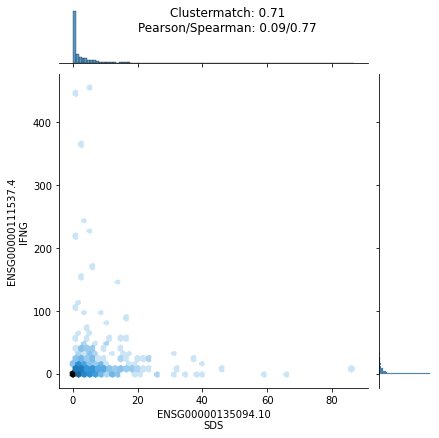

In [226]:
plot_gene_pair(_tmp_df, 0)

('ENSG00000130208.9', 'ENSG00000177606.6')

('APOC1', 'JUN')

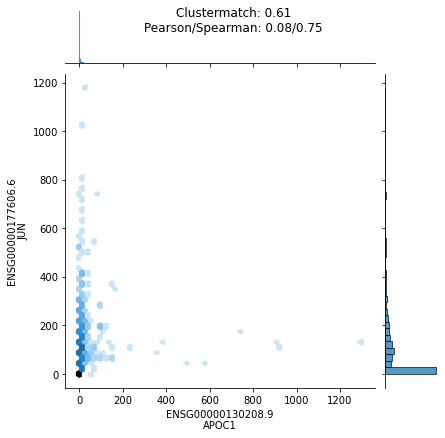

In [231]:
plot_gene_pair(_tmp_df, 1)

('ENSG00000130208.9', 'ENSG00000277632.1')

('APOC1', 'CCL3')

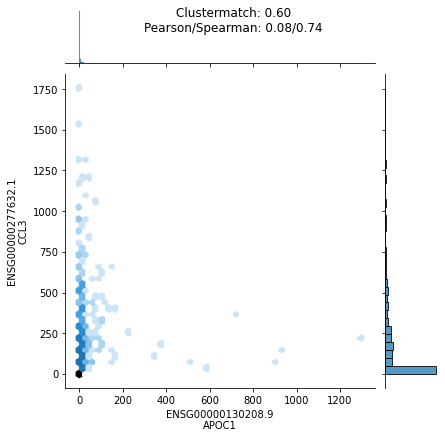

In [232]:
plot_gene_pair(_tmp_df, 2)

### Pearson vs Spearman

In [182]:
_tmp_df = df_r_data[
    ~(df_r_data["clustermatch_higher"])
    & ~(df_r_data["spearman_higher"])
    & (df_r_data["pearson_higher"])
    & ~(df_r_data["clustermatch_lower"])
    & (df_r_data["spearman_lower"])
    & ~(df_r_data["pearson_lower"])
]

# show this just to make sure of the groups
# display(_tmp_df.head())

_tmp_df = _tmp_df[[x for x in df_r_data.columns if "_" not in x]].sort_values(
    "pearson", ascending=False
)

display(_tmp_df.shape)
display(_tmp_df)

(87, 3)

clustermatch   pearson  spearman
ENSG00000136235.15 ENSG00000133800.8       0.038197  0.923450  0.196694
ENSG00000214274.9  ENSG00000110245.11      0.041971  0.783504  0.180828
                   ENSG00000145321.12      0.039793  0.768642  0.154682
                   ENSG00000130208.9       0.056221  0.732534  0.195886
ENSG00000145192.12 ENSG00000214274.9       0.041971  0.716884  0.163153
...                                             ...       ...       ...
ENSG00000143772.9  ENSG00000090104.11      0.061686  0.437508  0.197910
ENSG00000198178.10 ENSG00000281162.2       0.097293  0.436917  0.175440
ENSG00000109606.12 ENSG00000269919.1       0.035931  0.436786  0.196683
ENSG00000132424.14 ENSG00000090104.11      0.064704  0.436067  0.179254
ENSG00000117091.9  ENSG00000110848.8       0.045345  0.435425  0.174842

[87 rows x 3 columns]

('ENSG00000136235.15', 'ENSG00000133800.8')

('GPNMB', 'LYVE1')

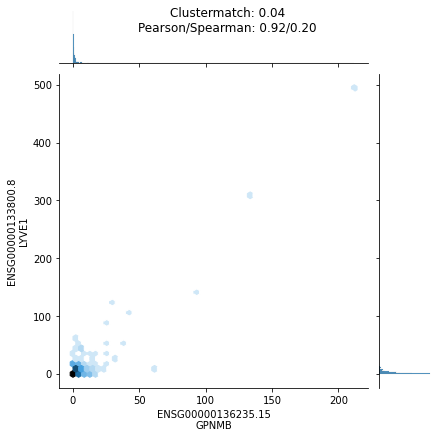

In [189]:
plot_gene_pair(_tmp_df, 0)

('ENSG00000214274.9', 'ENSG00000110245.11')

('ANG', 'APOC3')

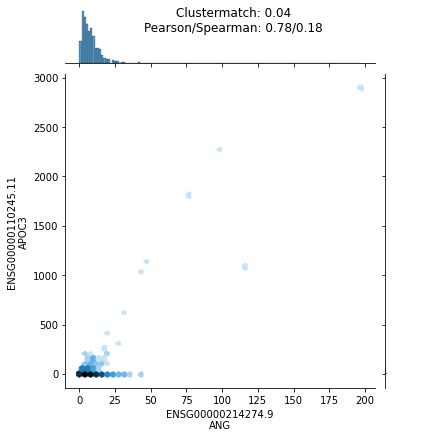

In [184]:
plot_gene_pair(_tmp_df, 1)

('ENSG00000214274.9', 'ENSG00000145321.12')

('ANG', 'GC')

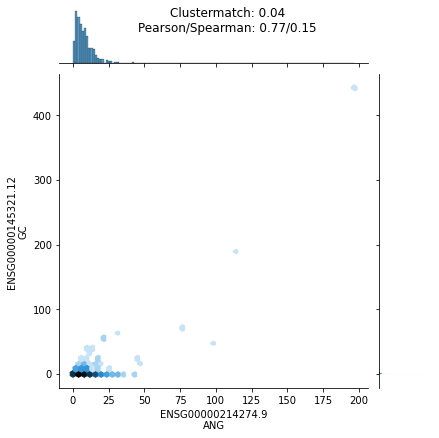

In [187]:
plot_gene_pair(_tmp_df, 2)

### Spearman vs Pearson

In [193]:
_tmp_df = df_r_data[
    ~(df_r_data["clustermatch_higher"])
    & (df_r_data["spearman_higher"])
    & ~(df_r_data["pearson_higher"])
    & ~(df_r_data["clustermatch_lower"])
    & ~(df_r_data["spearman_lower"])
    & (df_r_data["pearson_lower"])
]

# show this just to make sure of the groups
# display(_tmp_df.head())

_tmp_df = _tmp_df[[x for x in df_r_data.columns if "_" not in x]].sort_values(
    "pearson", ascending=False
)

display(_tmp_df.shape)
display(_tmp_df)

(527, 3)

,,clustermatch,pearson,spearman
ENSG00000214530.8,ENSG00000068976.13,0.172974,0.117812,0.612783
ENSG00000186827.10,ENSG00000244116.3,0.155717,0.117784,0.571360
ENSG00000116161.17,ENSG00000165272.14,0.164233,0.117784,0.562975
ENSG00000177272.8,ENSG00000211942.3,0.175195,0.117721,0.572729
ENSG00000131067.16,ENSG00000211956.2,0.159947,0.117652,0.577688
...,...,...,...,...
ENSG00000211976.2,ENSG00000196735.11,0.164233,0.024155,0.564312
ENSG00000165272.14,ENSG00000211976.2,0.168576,0.022240,0.588749
ENSG00000178498.15,ENSG00000211976.2,0.164233,0.021940,0.564289
ENSG00000211976.2,ENSG00000253998.3,0.164233,0.018452,0.579442


('ENSG00000214530.8', 'ENSG00000068976.13')

('STARD10', 'PYGM')

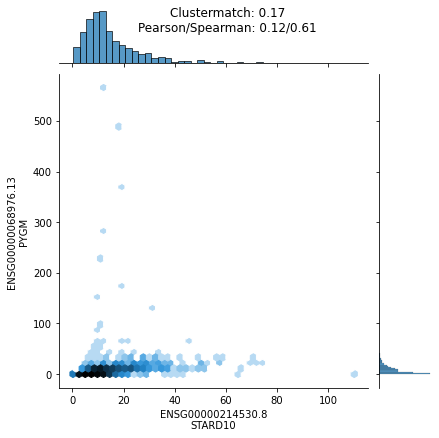

In [194]:
plot_gene_pair(_tmp_df, 0)

('ENSG00000186827.10', 'ENSG00000244116.3')

('TNFRSF4', 'IGKV2-28')

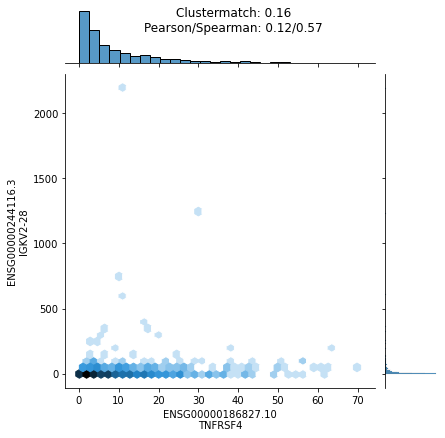

In [195]:
plot_gene_pair(_tmp_df, 1)

### Pearson vs Spearman/Clustermatch

In [190]:
_tmp_df = df_r_data[
    ~(df_r_data["clustermatch_higher"])
    & ~(df_r_data["spearman_higher"])
    & (df_r_data["pearson_higher"])
    & (df_r_data["clustermatch_lower"])
    & (df_r_data["spearman_lower"])
    & ~(df_r_data["pearson_lower"])
]

# show this just to make sure of the groups
# display(_tmp_df.head())

_tmp_df = _tmp_df[[x for x in df_r_data.columns if "_" not in x]].sort_values(
    "pearson", ascending=False
)

display(_tmp_df.shape)
display(_tmp_df)

(531, 3)

,,clustermatch,pearson,spearman
ENSG00000115009.11,ENSG00000161055.3,0.031833,0.988292,0.187233
ENSG00000163739.4,ENSG00000161055.3,0.007038,0.975534,0.078267
ENSG00000130598.15,ENSG00000198467.13,0.026588,0.948215,0.193457
ENSG00000198467.13,ENSG00000068976.13,0.034912,0.944430,0.029852
ENSG00000171345.13,ENSG00000163739.4,0.008663,0.939751,0.097291
...,...,...,...,...
ENSG00000162654.8,ENSG00000120217.13,0.025464,0.435255,0.004066
ENSG00000155368.16,ENSG00000166741.7,0.007392,0.435169,0.027366
ENSG00000198892.6,ENSG00000198125.12,0.006197,0.435107,0.116825
ENSG00000213639.9,ENSG00000121742.16,0.017215,0.435048,0.172672


('ENSG00000115009.11', 'ENSG00000161055.3')

('CCL20', 'SCGB3A1')

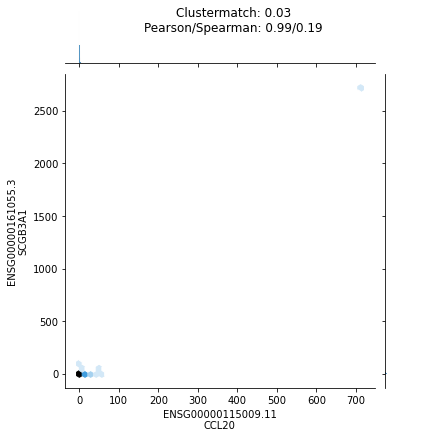

In [191]:
plot_gene_pair(_tmp_df, 0)

('ENSG00000163739.4', 'ENSG00000161055.3')

('CXCL1', 'SCGB3A1')

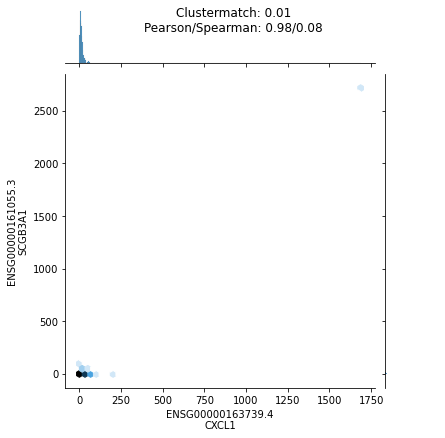

In [192]:
plot_gene_pair(_tmp_df, 1)

### Pearson vs Clustermatch

In [104]:
_tmp_df = df_r_data[
    ~(df_r_data["clustermatch_higher"])
    & ~(df_r_data["spearman_higher"])
    & (df_r_data["pearson_higher"])
    & (df_r_data["clustermatch_lower"])
    & ~(df_r_data["spearman_lower"])
    & ~(df_r_data["pearson_lower"])
]

# show this just to make sure of the groups
# display(_tmp_df.head())

_tmp_df = _tmp_df[[x for x in df_r_data.columns if "_" not in x]].sort_values(
    "pearson", ascending=False
)

display(_tmp_df.shape)
display(_tmp_df)

(1075, 3)

,,clustermatch,pearson,spearman
ENSG00000130598.15,ENSG00000177791.11,0.034593,0.967834,0.284206
ENSG00000086967.9,ENSG00000130598.15,0.034593,0.965012,0.314172
ENSG00000177791.11,ENSG00000068976.13,0.032751,0.964681,0.248365
ENSG00000086967.9,ENSG00000068976.13,0.032234,0.957893,0.234647
ENSG00000180209.11,ENSG00000068976.13,0.027118,0.955315,0.248569
...,...,...,...,...
ENSG00000275092.1,ENSG00000181800.5,0.020965,0.434911,0.232979
ENSG00000126368.5,ENSG00000092054.12,0.016958,0.434879,0.200617
ENSG00000081154.11,ENSG00000184205.14,0.033997,0.434810,0.317686
ENSG00000131013.3,ENSG00000255717.6,0.033879,0.434786,0.335524


('ENSG00000130598.15', 'ENSG00000177791.11')

('TNNI2', 'MYOZ1')

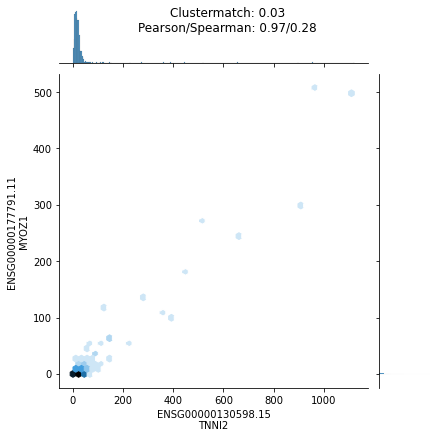

In [105]:
plot_gene_pair(_tmp_df, 0)

In [175]:
gene0, gene1 = (
    gene_expr_df.loc["ENSG00000130598.15"].copy(),
    gene_expr_df.loc["ENSG00000177791.11"].copy(),
)

In [176]:
cm(gene0, gene1)

0.036653156320795

In [177]:
q = 0.75
gene0[gene0 <= gene0.quantile(q)] = 0
gene0[gene0 > gene0.quantile(q)] = 1

gene1[gene1 <= gene1.quantile(q)] = 0
gene1[gene1 > gene1.quantile(q)] = 1

cm(gene0, gene1)

0.14800189304519354

('ENSG00000177409.11', 'ENSG00000149131.15')

('SAMD9L', 'SERPING1')

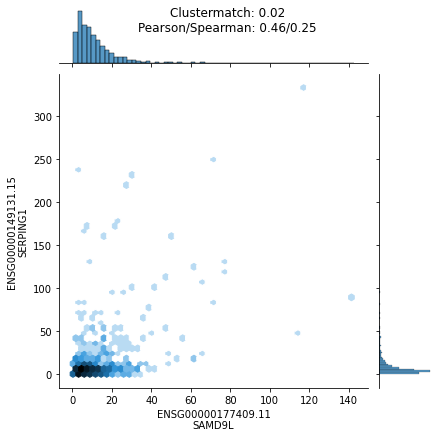

In [178]:
plot_gene_pair(_tmp_df, 500)

In [179]:
gene0, gene1 = (
    gene_expr_df.loc["ENSG00000177409.11"].copy(),
    gene_expr_df.loc["ENSG00000149131.15"].copy(),
)

In [180]:
cm(gene0, gene1)

0.02088621224941584

In [181]:
q = 0.75
gene0[gene0 <= gene0.quantile(q)] = 0
gene0[gene0 > gene0.quantile(q)] = 1

gene1[gene1 <= gene1.quantile(q)] = 0
gene1[gene1 > gene1.quantile(q)] = 1

cm(gene0, gene1)

0.13984895203198883

In [208]:
_tmp_df = df_r_data[
    ~(df_r_data["clustermatch_higher"])
    & ~(df_r_data["spearman_higher"])
    & (df_r_data["pearson_higher"])
    & (df_r_data["clustermatch_lower"])
    & ~(df_r_data["spearman_lower"])
    & ~(df_r_data["pearson_lower"])
]
display(_tmp_df)

,,pearson_higher,pearson_lower,spearman_higher,spearman_lower,clustermatch_higher,clustermatch_lower
ENSG00000139194.7,ENSG00000169715.14,True,False,False,False,False,True
ENSG00000185482.7,ENSG00000111245.14,True,False,False,False,False,True


In [209]:
# gene0, gene1 = _tmp_df.iloc[1].name
gene0, gene1 = "ENSG00000185482.7", "ENSG00000111245.14"
display((gene0, gene1))

gene0_symbol, gene1_symbol = gene_map[gene0], gene_map[gene1]
display((gene0_symbol, gene1_symbol))

_pearson, _spearman, _clustermatch = df.loc[
    (gene0, gene1), ["pearson", "spearman", "clustermatch"]
].tolist()

('ENSG00000185482.7', 'ENSG00000111245.14')

('STAC3', 'MYL2')

In [210]:
_title = f"Clustermatch: {_clustermatch:.2f}\nPearson/Spearman: {_pearson:.2f}/{_spearman:.2f}"

Text(0.5, 0.98, 'Clustermatch: 0.02\nPearson/Spearman: 0.81/0.21')

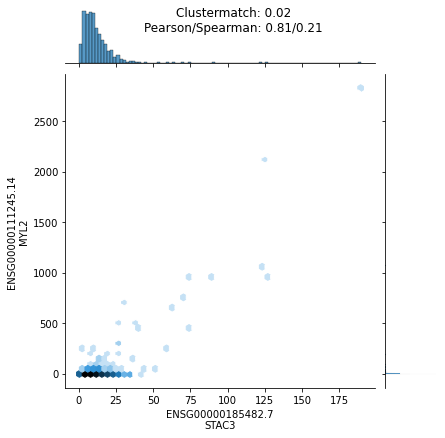

In [211]:
p = sns.jointplot(
    data=gene_expr_df.T,
    x=gene0,
    y=gene1,
    kind="hex",
    bins="log",
    # ylim=(0, 500),
)

gene_x_id = p.ax_joint.get_xlabel()
gene_x_symbol = gene_map[gene_x_id]
p.ax_joint.set_xlabel(f"{gene_x_id}\n{gene_x_symbol}")

gene_y_id = p.ax_joint.get_ylabel()
gene_y_symbol = gene_map[gene_y_id]
p.ax_joint.set_ylabel(f"{gene_y_id}\n{gene_y_symbol}")

p.fig.suptitle(_title)

Text(0.5, 1.0, 'Clustermatch: 0.02\nPearson/Spearman: 0.81/0.21')

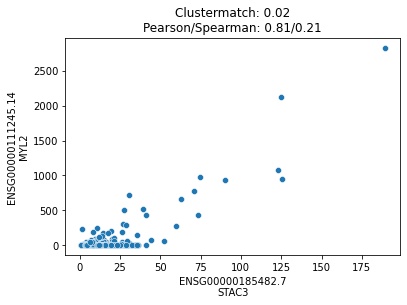

In [212]:
p = sns.scatterplot(
    data=gene_expr_df.T,
    x=gene0,
    y=gene1,
    # kind="hex",
    # bins="log",
    # ylim=(0, 500),
)
# p.set_ylim(0, 100)

gene_x_id = p.get_xlabel()
gene_x_symbol = gene_map[gene_x_id]
p.set_xlabel(f"{gene_x_id}\n{gene_x_symbol}")

gene_y_id = p.get_ylabel()
gene_y_symbol = gene_map[gene_y_id]
p.set_ylabel(f"{gene_y_id}\n{gene_y_symbol}")

p.set_title(_title)